### Load the Dataset

In [143]:
import pandas as pd

# Load the dataset
file_path = 'dataset/data.tsv'
data = pd.read_csv(file_path, sep='\t', header=None, names=['Token', 'POS', 'NER'], skip_blank_lines=False)

# Display the first few rows
print(data.head(20))

                                                Token    POS    NER
0   শনিবার (২৭ আগস্ট) রাতে পটুয়াখালী সদর থানার ভা...    NaN    NaN
1                                              শনিবার    NNP  B-D&T
2                                                 (২৭  PUNCT  B-OTH
3                                              আগস্ট)    NNP  B-D&T
4                                                রাতে    NNC  B-D&T
5                                          পটুয়াখালী    NNP  B-GPE
6                                                 সদর    NNC  I-GPE
7                                               থানার    NNC  I-GPE
8                                          ভারপ্রাপ্ত    ADJ  B-PER
9                                           কর্মকর্তা    NNC  I-PER
10                                              (ওসি)  PUNCT  B-OTH
11                                               মো.    NNP  B-PER
12                                       মনিরুজ্জামান    NNP  I-PER
13                                              

In [144]:
data.shape

(53438, 3)

### Clean and Preprocess the Data

In [145]:
data.isna().sum()

Token    4054
POS      8112
NER      8114
dtype: int64

In [146]:
# Count the number of unique sentences
# A sentence is identified by rows where Token, POS and NER are NaN
blank_rows = data[data['Token'].isna() & data['POS'].isna() & data['NER'].isna()].shape[0]

print(f"Number of sentences in the raw dataset: {blank_rows}")

Number of sentences in the raw dataset: 4054


In [147]:
data_cleaned = data.dropna(how='all')
data_cleaned.reset_index(drop=True, inplace=True)

missing_values = data_cleaned.isna().sum()
missing_values

Token       0
POS      4058
NER      4060
dtype: int64

In [148]:
num_sentences = data_cleaned[data_cleaned['POS'].isna() & data_cleaned['NER'].isna()].shape[0]
num_sentences

4058

In [149]:
# Initialize the 'Sentence #' column
data_cleaned['Sentence #'] = None

# Counter for sentence numbers
sentence_counter = 0

# Iterate over the rows
for index, row in data_cleaned.iterrows():
    if pd.isna(row['POS']) and pd.isna(row['NER']):
        sentence_counter += 1  # Increment counter at the start of a new sentence
    else:
        data_cleaned.at[index, 'Sentence #'] = sentence_counter

# Reorder columns to have 'Sentence #' first
data_cleaned = data_cleaned[['Sentence #', 'Token', 'POS', 'NER']]

c:\Users\UTSHAB\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
data_cleaned.head(20)

,Sentence #,Token,POS,NER
0,None,শনিবার (২৭ আগস্ট) রাতে পটুয়াখালী সদর থানার ভা...,NaN,NaN
1,1,শনিবার,NNP,B-D&T
2,1,(২৭,PUNCT,B-OTH
3,1,আগস্ট),NNP,B-D&T
4,1,রাতে,NNC,B-D&T
5,1,পটুয়াখালী,NNP,B-GPE
6,1,সদর,NNC,I-GPE
7,1,থানার,NNC,I-GPE
8,1,ভারপ্রাপ্ত,ADJ,B-PER
9,1,কর্মকর্তা,NNC,I-PER


In [151]:
# Display rows where 'POS' or 'NER' are NaN
rows_with_missing_tags = data_cleaned[data_cleaned['POS'].isna() | data_cleaned['NER'].isna()]
rows_with_missing_tags.head(5)

,Sentence #,Token,POS,NER
0,None,শনিবার (২৭ আগস্ট) রাতে পটুয়াখালী সদর থানার ভা...,NaN,NaN
17,None,বায়ুদূষণ ও স্মার্ট ফোন ছেলেমেয়ে উভয়ের প্রজনন ক...,NaN,NaN
29,None,ছাত্র রাজনীতির বর্তমান অবস্থার শুরু হয়েছিলো ...,NaN,NaN
40,None,"শাকিল রাজধানীর ৩০০ ফিট, দিয়াবাড়ি ও পূর্বাচল ...",NaN,NaN
57,None,সম্প্রতি ক্লাবের নবীন ব্যবস্থাপনা প্রশিক্ষণার্...,NaN,NaN


In [152]:
# Fill missing values in 'POS' and 'NER' with 'UNKNOWN'
data_cleaned = data_cleaned.dropna(subset=['POS', 'NER'])

missing_values_filled = data_cleaned.isna().sum()
missing_values_filled

Sentence #    0
Token         0
POS           0
NER           0
dtype: int64

In [153]:
data_cleaned.head()

,Sentence #,Token,POS,NER
1,1,শনিবার,NNP,B-D&T
2,1,(২৭,PUNCT,B-OTH
3,1,আগস্ট),NNP,B-D&T
4,1,রাতে,NNC,B-D&T
5,1,পটুয়াখালী,NNP,B-GPE


In [154]:
data_cleaned.shape

(45324, 4)

### More Exploratory Analysis

In [155]:
print(f"number of unique words in the dataset = {len(data_cleaned['Token'].unique())}")
print(f"number of unique POS tags = {len(data_cleaned['POS'].unique())}")
print(f"number of unique NER tags = {len(data_cleaned['NER'].unique())}")

number of unique words in the dataset = 16247
number of unique POS tags = 15
number of unique NER tags = 21


In [156]:
# Distribution of tokens
token_distribution = data_cleaned['Token'].value_counts()
print("Top 20 Tokens:")
print(token_distribution.head(20))

Top 20 Tokens:
ও           442
বলেন,       321
থেকে        285
এ           268
করে         251
করা         228
এই          215
এবং         174
জন্য        168
তিনি        160
এক          159
একটি        155
হয়েছে।     130
করতে        129
:           126
বাংলাদেশ    110
না          109
হবে।        106
মধ্যে       105
হয়।        103
Name: Token, dtype: int64


In [157]:
token_distribution.tail(5)

৩)            1
প্রয়াত       1
স্টেডিয়ামে    1
পিয়াসা।      1
আম-৪          1
Name: Token, dtype: int64

In [158]:
# Distribution of POS tags
pos_distribution = data_cleaned['POS'].value_counts()
print("POS Tag Distribution:")
print(pos_distribution)

POS Tag Distribution:
NNC      17803
NNP       7544
ADJ       4581
VF        4417
QF        1971
PP        1866
VNF       1602
ADV       1461
PRO       1329
CONJ       947
PUNCT      859
DET        773
PART        85
OTH         67
INTJ        19
Name: POS, dtype: int64


In [159]:
# Distribution of NER tags
ner_distribution = data_cleaned['NER'].value_counts()
print("NER Tag Distribution:")
print(ner_distribution)

NER Tag Distribution:
B-OTH      30932
B-PER       3565
B-ORG       1575
I-PER       1426
B-NUM       1314
I-ORG       1151
B-GPE        997
B-D&T        996
I-D&T        787
B-EVENT      551
B-LOC        460
B-UNIT       301
I-NUM        277
I-EVENT      253
B-MISC       249
I-LOC        232
B-T&T        106
I-T&T         52
I-GPE         51
I-MISC        37
I-UNIT        12
Name: NER, dtype: int64


In [160]:
# Define a threshold for infrequent tags (e.g., less than a certain count)
threshold = 5

# Identify infrequent POS tags
infrequent_pos_tags = pos_distribution[pos_distribution < threshold].index

# Identify infrequent NER tags
infrequent_ner_tags = ner_distribution[ner_distribution < threshold].index

print("Infrequent POS Tags:")
print(infrequent_pos_tags)

print("Infrequent NER Tags:")
print(infrequent_ner_tags)


Infrequent POS Tags:
Index([], dtype='object')
Infrequent NER Tags:
Index([], dtype='object')


In [161]:
# Remove rows with infrequent POS or NER tags
data_cleaned = data_cleaned[~data_cleaned['POS'].isin(infrequent_pos_tags) & ~data_cleaned['NER'].isin(infrequent_ner_tags)]
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned.head(5)

,Sentence #,Token,POS,NER
0,1,শনিবার,NNP,B-D&T
1,1,(২৭,PUNCT,B-OTH
2,1,আগস্ট),NNP,B-D&T
3,1,রাতে,NNC,B-D&T
4,1,পটুয়াখালী,NNP,B-GPE


In [162]:
# Summary of distributions
print("\nToken Distribution Summary:")
print(token_distribution.describe())

print("\nPOS Tag Distribution Summary:")
print(pos_distribution.describe())

print("\nNER Tag Distribution Summary:")
print(ner_distribution.describe())


Token Distribution Summary:
count    16247.000000
mean         2.789684
std          9.016175
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        442.000000
Name: Token, dtype: float64

POS Tag Distribution Summary:
count       15.000000
mean      3021.600000
std       4578.532622
min         19.000000
25%        816.000000
50%       1461.000000
75%       3194.000000
max      17803.000000
Name: POS, dtype: float64

NER Tag Distribution Summary:
count       21.000000
mean      2158.285714
std       6643.519467
min         12.000000
25%        232.000000
50%        460.000000
75%       1151.000000
max      30932.000000
Name: NER, dtype: float64


In [163]:
data_cleaned.shape

(45324, 4)

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

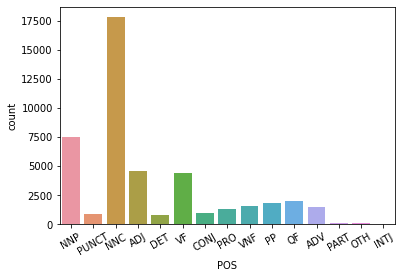

In [165]:
sns.countplot(data=data_cleaned, x='POS', hue = 'POS', dodge=False).legend_.remove()
plt.xticks(rotation=30)
plt.show()

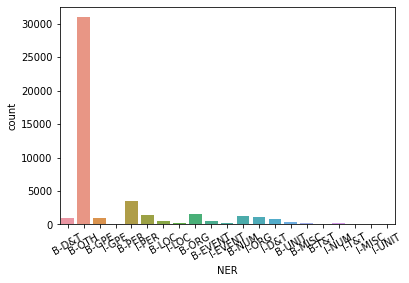

In [166]:
sns.countplot(data=data_cleaned, x='NER', hue = 'NER', dodge=False).legend_.remove()
plt.xticks(rotation=30)
plt.show()

### Tokenize and Pad Sequences

In [167]:
# from bnlp import NLTKTokenizer

# bnltk = NLTKTokenizer()

# text = "আমি ভাত খাই। সে বাজারে যায়। তিনি কি সত্যিই ভালো মানুষ?"
# word_tokens = bnltk.word_tokenize(text)
# sentence_tokens = bnltk.sentence_tokenize(text)
# print(word_tokens)
# print(sentence_tokens)

In [168]:
words = list(set(data_cleaned['Token'].values))
# put padding end token at the end
words.append('ENDPAD')
nbr_words = len(words)
nbr_words

16248

In [169]:
poss = list(set(data_cleaned['POS'].values))
nbr_pos = len(poss)
nbr_pos

15

In [170]:
ners = list(set(data_cleaned['NER'].values))
nbr_ners = len(ners)
nbr_ners

21

In [172]:
# # Check lengths of sequences
# print(f"Token sequence length: {sequences.shape[1]}")
# print(f"POS sequence length: {pos_sequences.shape[1]}")
# print(f"NER sequence length: {ner_sequences.shape[1]}")

# # Verify that all sequences have the same length
# assert sequences.shape[1] == pos_sequences.shape[1] == ner_sequences.shape[1], "Sequences have different lengths!"

In [185]:
def combine_word_ner_pos(data):
    """
    Input (Pandas DataFrame): containing the dataset we want to group by sentence
    Output (2D list): a 2D list where wach inner list corresponds to sentence and has tuples like so (word, pos, ner)
    """
    # create the list of tuples (word, pos, tag)
    tuples_fun =  lambda s:[(word, pos, ner) for word, pos, ner in zip(s['Token'].values.tolist(), s['POS'].values.tolist(), s['NER'].values.tolist())]
    # group tuples by sentence to create the second dimension
    combination = data.groupby('Sentence #').apply(tuples_fun).tolist()
    
    return combination

In [186]:
# apply the function on the dataset
combination = combine_word_ner_pos(data_cleaned)
combination[:5]

[[('শনিবার', 'NNP', 'B-D&T'),
  ('(২৭', 'PUNCT', 'B-OTH'),
  ('আগস্ট)', 'NNP', 'B-D&T'),
  ('রাতে', 'NNC', 'B-D&T'),
  ('পটুয়াখালী', 'NNP', 'B-GPE'),
  ('সদর', 'NNC', 'I-GPE'),
  ('থানার', 'NNC', 'I-GPE'),
  ('ভারপ্রাপ্ত', 'ADJ', 'B-PER'),
  ('কর্মকর্তা', 'NNC', 'I-PER'),
  ('(ওসি)', 'PUNCT', 'B-OTH'),
  ('মো.', 'NNP', 'B-PER'),
  ('মনিরুজ্জামান', 'NNP', 'I-PER'),
  ('এ', 'DET', 'B-OTH'),
  ('তথ্য', 'NNC', 'B-OTH'),
  ('নিশ্চিত', 'ADJ', 'B-OTH'),
  ('করেছেন।', 'VF', 'B-OTH')],
 [('বায়ুদূষণ', 'NNC', 'B-OTH'),
  ('ও', 'CONJ', 'B-OTH'),
  ('স্মার্ট', 'NNC', 'B-OTH'),
  ('ফোন', 'NNC', 'B-OTH'),
  ('ছেলেমেয়ে', 'NNC', 'B-PER'),
  ('উভয়ের', 'PRO', 'B-OTH'),
  ('প্রজনন', 'NNC', 'B-OTH'),
  ('ক্ষমতা', 'NNC', 'B-OTH'),
  ('হ্রাস', 'NNC', 'B-OTH'),
  ('করে', 'VNF', 'B-OTH'),
  ('দিচ্ছে।', 'VF', 'B-OTH')],
 [('ছাত্র', 'NNC', 'B-OTH'),
  ('রাজনীতির', 'NNC', 'B-OTH'),
  ('বর্তমান', 'ADJ', 'B-OTH'),
  ('অবস্থার', 'NNC', 'B-OTH'),
  ('শুরু', 'NNC', 'B-OTH'),
  ('হয়েছিলো', 'VF', 'B-OTH'),
  ('স্বৈর

#### Building the vocabulary

In [187]:

words_vocab = {word: i+1 for i, word in enumerate(words)}
ners_vocab = {ner: i+1 for i, ner in enumerate(ners)}
pos_vocab = {pos: i+1 for i, pos in enumerate(poss)}

print(list(words_vocab)[:5])
print(list(pos_vocab))
print(list(ners_vocab)[:5])

['সমন্বিত', 'পাঠায়', 'শেপের', 'বালিকার', 'আই-এর']
['ADV', 'NNP', 'PP', 'VNF', 'QF', 'PART', 'NNC', 'OTH', 'PUNCT', 'ADJ', 'PRO', 'CONJ', 'DET', 'INTJ', 'VF']
['B-MISC', 'I-MISC', 'B-OTH', 'I-LOC', 'B-ORG']


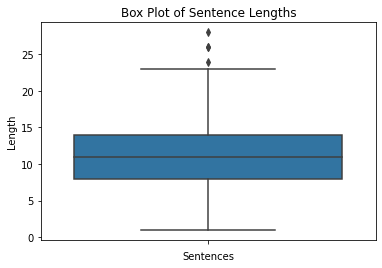

In [188]:
# Calculate the lengths of the sentences
sentence_lengths = [len(c) for c in combination]

# Create the box plot
sns.boxplot(y=sentence_lengths)

# Set plot labels
plt.xlabel('Sentences')
plt.ylabel('Length')
plt.title('Box Plot of Sentence Lengths')

# Show the plot
plt.show()

We will take it as maximum length (25, disregarding the outliers) to take into consideration the longer sentences as well - and pad any shorter ones.

In [191]:
list(words_vocab.items())[nbr_words-1]

('ENDPAD', 16248)

In [195]:
list(pos_vocab.items())[nbr_pos-1]

('VF', 15)

In [192]:
pos_vocab

{'ADJ': 10,
 'ADV': 1,
 'CONJ': 12,
 'DET': 13,
 'INTJ': 14,
 'NNC': 7,
 'NNP': 2,
 'OTH': 8,
 'PART': 6,
 'PP': 3,
 'PRO': 11,
 'PUNCT': 9,
 'QF': 5,
 'VF': 15,
 'VNF': 4}

In [198]:
from keras_preprocessing.sequence import pad_sequences
# define maximum sentence length
max_len = 25

# creating the features set
# getting nbr representation for each word
x = [[words_vocab[tuple[0]] for tuple in c] for c in combination]
# padding the sentences so they would all be 25 words (padding value: 'ENDPAD')
x = pad_sequences(maxlen=max_len, sequences = x, padding='post', value = nbr_words-1)

# creating the target set
# getting nbr representation for each pos
y = [[pos_vocab[tuple[1]] for tuple in c] for c in combination]
# padding the sentences so they would all be the same length (padding value O - other)
y = pad_sequences(maxlen=max_len, sequences=y, padding='post', value = nbr_pos-1)

In [199]:
# take a look at the x and y sets
print('feature set: ',x[:2])
print('labels: ', y[:2])

feature set:  [[  194  5725 15557 15148  9282 10402  8778  2021  3851  3000   656  5084
   9966  7788 12764  9620 16247 16247 16247 16247 16247 16247 16247 16247
  16247]
 [ 3274  5939 10426 14106   805 15091   619  3236  2914   654 14328 16247
  16247 16247 16247 16247 16247 16247 16247 16247 16247 16247 16247 16247
  16247]]
labels:  [[ 2  9  2  7  2  7  7 10  7  9  2  2 13  7 10 15 14 14 14 14 14 14 14 14
  14]
 [ 7 12  7  7  7 11  7  7  7  4 15 14 14 14 14 14 14 14 14 14 14 14 14 14
  14]]


### Train-Test

In [200]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)

In [201]:
print(f'train_x size: {train_x.shape}')
print(f'train_y size: {train_y.shape}')
print(f'test_x size: {test_x.shape}')
print(f'test_y size: {test_y.shape}')

train_x size: (3246, 25)
train_y size: (3246, 25)
test_x size: (812, 25)
test_y size: (812, 25)


In [203]:
import numpy as np
import pickle
import os

os.makedirs('processed_data', exist_ok=True)

# Save the arrays
np.save('./processed_data/train_x.npy', train_x)
np.save('./processed_data/test_x.npy', test_x)
np.save('./processed_data/train_y.npy', train_y)
np.save('./processed_data/test_y.npy', test_y)

# Save the vocab dictionaries
with open('./processed_data/words_vocab.pkl', 'wb') as f:
    pickle.dump(words_vocab, f)

with open('./processed_data/pos_vocab.pkl', 'wb') as f:
    pickle.dump(pos_vocab, f)

with open('./processed_data/ners_vocab.pkl', 'wb') as f:
    pickle.dump(ners_vocab, f)

# Save the words, poss, and ners lists
with open('processed_data/words.pkl', 'wb') as f:
    pickle.dump(words, f)

with open('processed_data/poss.pkl', 'wb') as f:
    pickle.dump(poss, f)

with open('processed_data/ners.pkl', 'wb') as f:
    pickle.dump(ners, f)